In [1]:
!pip install langgraph langsmith langchain langchain_groq langchain_community

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.8/135.8 kB 9.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 24.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 31.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.8/108.8 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 kB 19.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 3.1 MB/s eta 0:00:00
  Attempting uninstall: langchain-core
    Found existing installation: langchain-core 0.3.21
    Uninstalling langchain-core-0.3.21:
      Successfully uninstalled langchain-core-0.3.21
  Attempting uninstall: langchain
    Found existing installation: langchain 0.3.9
    Uninstalling langchain-0.3.9:
      Successfully uninstalled langchain-0.3.9


In [2]:
from langchain_groq import ChatGroq
from google.colab import userdata
groq_api_key=userdata.get("groq_api_key")

llm=ChatGroq(groq_api_key=groq_api_key,model_name="Gemma2-9b-It")
llm

ChatGroq(client=<groq.resources.chat.completions.Completions object at 0x7e73ed3c4ca0>, async_client=<groq.resources.chat.completions.AsyncCompletions object at 0x7e73ed674f40>, model_name='Gemma2-9b-It', model_kwargs={}, groq_api_key=SecretStr('**********'))

In [3]:
from langgraph.checkpoint.memory import MemorySaver

memory = MemorySaver()

In [5]:
from typing import Annotated
from typing_extensions import TypedDict
from langgraph.graph.message import add_messages
from langgraph.graph import StateGraph, START, END

class State(TypedDict):
  messages: Annotated[list, add_messages]

graph_builder = StateGraph(State)

def chatbot(state: State):
  return {"messages": [llm.invoke(state["messages"])]}

graph_builder.add_node("chatbot", chatbot)
graph_builder.add_edge(START,"chatbot")
graph_builder.add_edge("chatbot",END)

In [6]:
graph = graph_builder.compile(checkpointer=memory)

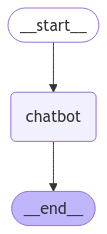

In [7]:
from IPython.display import Image, display

try:
    display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
    # This requires some extra dependencies and is optional
    pass

In [8]:
config = {"configurable": {"thread_id": "1"}}

In [9]:
user_input = "Hi there! My name is Kedar."

# The config is the **second positional argument** to stream() or invoke()!
events = graph.stream(
    {"messages": [("user", user_input)]}, config, stream_mode="values"
)
for event in events:
    event["messages"][-1].pretty_print()

================================ Human Message =================================

Hi there! My name is Kedar.
================================== Ai Message ==================================

Hi Kedar, it's nice to meet you! 👋

What can I do for you today? 😊


In [10]:
user_input = "What is my name?"

# The config is the **second positional argument** to stream() or invoke()!
events = graph.stream(
    {"messages": [("user", user_input)]}, config, stream_mode="values"
)
for event in events:
    event["messages"][-1].pretty_print()

================================ Human Message =================================

What is my name?
================================== Ai Message ==================================

Your name is Kedar. You told me at the beginning of our conversation! 😄 

Is there anything else I can help you with?


In [11]:
user_input = "What is Java?"

# The config is the **second positional argument** to stream() or invoke()!
events = graph.stream(
    {"messages": [("user", user_input)]}, config, stream_mode="values"
)
for event in events:
    event["messages"][-1].pretty_print()

================================ Human Message =================================

What is Java?
================================== Ai Message ==================================

Java is a popular, powerful, and versatile programming language. 

Here's a breakdown:

**What it is:**

* **Object-oriented:**  Java is structured around the concept of "objects," which are like blueprints for creating things in your program. This makes code more organized, reusable, and easier to understand.
* **Compiled language:**  Java code is first translated into a special format called bytecode, which can then be run on any device with a Java Virtual Machine (JVM).
* **Platform-independent:** Because of the JVM, Java programs can run on various operating systems (Windows, macOS, Linux, etc.) without needing to be rewritten.

**What it's used for:**

* **Android app development:**  Java is the primary language for creating Android apps.
* **Enterprise applications:**  Large companies use Java to build ro

In [12]:
user_input = "What is GenAI?"

# The config is the **second positional argument** to stream() or invoke()!
events = graph.stream(
    {"messages": [("user", user_input)]}, config, stream_mode="values"
)
for event in events:
    event["messages"][-1].pretty_print()

================================ Human Message =================================

What is GenAI?
================================== Ai Message ==================================

GenAI stands for **Generative Artificial Intelligence**. 

It's a type of AI that focuses on creating new content, rather than just analyzing existing data. Imagine AI that can write stories, compose music, design images, or even generate code – that's GenAI in action!

Here's a breakdown:

* **Generative:**  This means the AI can produce original outputs, not just copy or summarize existing information.
* **Artificial Intelligence:** It relies on complex algorithms and machine learning techniques to learn patterns and structures from data, enabling it to create something new.

**How it works:**

GenAI models are typically trained on massive datasets of text, code, images, or other types of data. They learn the underlying patterns and relationships within this data, allowing them to generate new content that r

In [13]:
user_input = "What is Python in Computer Science"

# The config is the **second positional argument** to stream() or invoke()!
events = graph.stream(
    {"messages": [("user", user_input)]}, config, stream_mode="values"
)
for event in events:
    event["messages"][-1].pretty_print()

================================ Human Message =================================

What is Python in Computer Science
================================== Ai Message ==================================

Python is like a versatile Swiss Army knife in the world of computer science. It's a high-level, interpreted programming language known for its readability and beginner-friendliness.  

Here's a breakdown:

**What makes Python special:**

* **Readable Syntax:** Python's code resembles plain English, making it easier to learn and understand compared to some other languages with more complex syntax.

* **Beginner-Friendly:** Its simple structure and clear rules make it a great starting point for aspiring programmers.

* **Versatile:** Python is used in a wide range of applications, from web development and data science to scripting, automation, and artificial intelligence.

* **Extensive Libraries:** Python boasts a vast collection of pre-written code (libraries) that provide ready-made solut

In [14]:
user_input = "Who is Harry Potter?"

# The config is the **second positional argument** to stream() or invoke()!
events = graph.stream(
    {"messages": [("user", user_input)]}, config, stream_mode="values"
)
for event in events:
    event["messages"][-1].pretty_print()

================================ Human Message =================================

Who is Harry Potter?
================================== Ai Message ==================================

Harry Potter is the titular character of J.K. Rowling's beloved fantasy book series, *Harry Potter*. 

Here's a quick rundown:

* **The Boy Who Lived:** Harry is famous in the wizarding world for surviving Lord Voldemort's killing curse as a baby, leaving him with a lightning-shaped scar. This event made Voldemort disappear and earned Harry the title "The Boy Who Lived."
* **Orphaned and Unhappy:**  Harry lived a miserable life with his neglectful and abusive aunt, uncle, and cousin before attending Hogwarts School of Witchcraft and Wizardry on his eleventh birthday.
* **Chosen One:**  Harry learns he is a wizard and that he's destined to face Lord Voldemort, who seeks to regain power and immortality.
* **Loyal Friends:**  At Hogwarts, Harry befriends Ron Weasley and Hermione Granger, who become his loya

In [15]:
user_input = "What is AI?"

# The config is the **second positional argument** to stream() or invoke()!
events = graph.stream(
    {"messages": [("user", user_input)]}, config, stream_mode="values"
)
for event in events:
    event["messages"][-1].pretty_print()

================================ Human Message =================================

What is AI?
================================== Ai Message ==================================

AI stands for **Artificial Intelligence**. 

Essentially, it's the ability of a computer or a robot controlled by a computer to do tasks that are usually done by humans because they require human intelligence and discernment. 

Here's a breakdown:

**Key Characteristics of AI:**

* **Learning:** AI systems can learn from data, identify patterns, and make predictions or decisions based on that learning.
* **Reasoning:** AI can use logic and rules to solve problems and draw conclusions.
* **Problem-solving:** AI can find solutions to complex problems, often by exploring multiple options and evaluating their consequences.
* **Perception:** Some AI systems can interpret sensory information like images, sound, and text, allowing them to "understand" their environment.
* **Natural Language Processing (NLP):**  AI can u

In [16]:
user_input = "What is Capital of India?"

# The config is the **second positional argument** to stream() or invoke()!
events = graph.stream(
    {"messages": [("user", user_input)]}, config, stream_mode="values"
)
for event in events:
    event["messages"][-1].pretty_print()

================================ Human Message =================================

What is Capital of India?
================================== Ai Message ==================================

The capital of India is **New Delhi**.


In [17]:
user_input = "What is London system in Chess"

# The config is the **second positional argument** to stream() or invoke()!
events = graph.stream(
    {"messages": [("user", user_input)]}, config, stream_mode="values"
)
for event in events:
    event["messages"][-1].pretty_print()

================================ Human Message =================================

What is London system in Chess
================================== Ai Message ==================================

The London System in chess is a popular opening system known for its flexibility, simplicity, and strategic depth. 

Here's a breakdown:

**Key Ideas:**

* **Early Queen Development:** The London System typically involves developing the queen quickly to d3, aiming for a strong central presence and controlling important squares.
* **Flexible Piece Placement:**  Instead of rigidly following specific lines, the London System emphasizes developing pieces naturally and reacting to the opponent's moves.
* **Solid Pawn Structure:**  Players often create a solid pawn structure with pawns on c4 and d4, aiming for control of the center.
* **Proactive Play:**  The London System encourages players to be proactive, looking for opportunities to attack and create imbalances.

**Typical Moves:**

1. d4  (The i

In [18]:
user_input = "What is my name?"

# The config is the **second positional argument** to stream() or invoke()!
events = graph.stream(
    {"messages": [("user", user_input)]}, config, stream_mode="values"
)
for event in events:
    event["messages"][-1].pretty_print()

================================ Human Message =================================

What is my name?
================================== Ai Message ==================================

Your name is Kedar.  😊 

Is there anything else I can help you with?


In [19]:
user_input = "What is the 1st message of this conversastion"

# The config is the **second positional argument** to stream() or invoke()!
events = graph.stream(
    {"messages": [("user", user_input)]}, config, stream_mode="values"
)
for event in events:
    event["messages"][-1].pretty_print()

================================ Human Message =================================

What is the 1st message of this conversastion
================================== Ai Message ==================================

The first message of our conversation was: "Hi there! My name is Kedar." 



Let me know if you have any other questions!


In [22]:
# The only difference is we change the `thread_id` here to "2" instead of "1"
user_input = "What is the my name"
events = graph.stream(
    {"messages": [("user", user_input)]},
    {"configurable": {"thread_id": "2"}},
    stream_mode="values",
)
for event in events:
    event["messages"][-1].pretty_print()

================================ Human Message =================================

What is the my name
================================== Ai Message ==================================

As an AI, I don't have access to past conversations or any information about you, including your name. If you'd like to tell me your name, I'd be happy to know! 😊
